# PART ONE: MNIST HANDWRITTED DIGITS
Start by loading the data set and then scaling it using the sklearn.preprocessing.scale method so that the mean entries are 0 and the variances are 1.
Plot a few of the sample images using the imshow method to see what you're working with.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

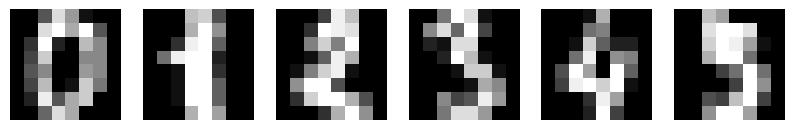

In [3]:
digits = load_digits()

scaler = StandardScaler()

scaledData = scaler.fit_transform(digits.data)

numImages = 6
fig, axes = plt.subplots(1, numImages, figsize=(10,3))
for i in range(numImages):
        ax = axes[i]
        ax.imshow(np.reshape(digits.data[i],(8,8)), cmap='gray')
        ax.axis('off')

plt.show

## CLASSIFICATION SVM
Use sklearn's train_test_split method to divide the data into training and testing sets

SVM

Use SVM with an rbf kernel and parameter C=100 to build a classifier using the training dataset.

Using the test dataset, evaluate the accuracy of the model. Again using the test dataset, compute the confusion matrix. What is the most common mistake that the classifier makes?

Plot all of these misclassified digits as images.

Using the 'cross_val_score' function, evaluate the accuracy of the SVM for 100 different values of the parameter C between 1 and 500. What is the best value?

Try to train and test the algorithm on the raw (non-scaled) data. What's your accuracy score?

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter


Accuracy: 0.9814814814814815
Confusion Matrix: 
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  2 51  0  1  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 65  0  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  0  1  1  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  1  0  2 56]]


<function matplotlib.pyplot.show(close=None, block=None)>

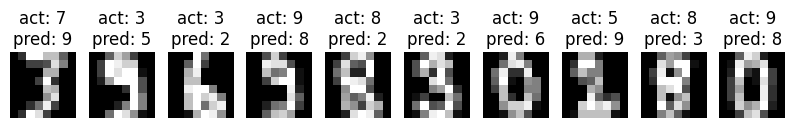

In [22]:
# i am gonna use the same data as i used before in the warmup
xTrain, xTest, yTrain, yTest = train_test_split(scaledData,digits.target, test_size=0.3, random_state=42)
svm = SVC(kernel='rbf', C=100)
svm.fit(xTrain,yTrain)

yPrediction = svm.predict(xTest)
accuracy = accuracy_score(yTest, yPrediction)
confusionMatrix = confusion_matrix(yTest,yPrediction)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n {confusionMatrix}') # add new line to make output prettier

#find all the stuff our model misclassified
misclassified = np.where(yTest != yPrediction)[0]

#plot all the misclassified points
fig, axes = plt.subplots(1, len(misclassified), figsize=(10,3))
for i, idx in enumerate(misclassified):
    ax = axes[i]
    ax.imshow(np.reshape(digits.data[idx],(8,8)),cmap='gray')
    ax.set_title(f'act: {yTest[idx]}\npred: {yPrediction[idx]}')
    ax.axis('off')

plt.show


In [17]:
#find most common mistake
mistakes = [(yTest[i], yPrediction[i]) for i in misclassified]
mostCommonMistake = Counter(mistakes).most_common(1)[0]

print(f'Most common mistake: Actual {mostCommonMistake[0][0]} predicted as {mostCommonMistake[0][1]}, occurred {mostCommonMistake[1]} times')

Most common mistake: Actual 3 predicted as 2, occurred 2 times


Best C value: 6.040404040404041


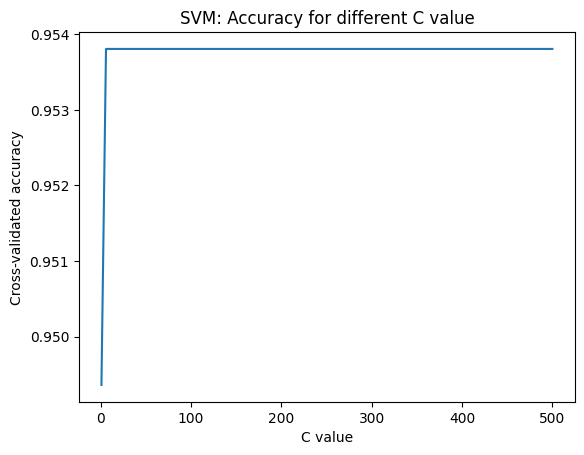

Accuracy on raw data: 0.9888888888888889


In [23]:
# cross validate to find best c val
C_values = np.linspace(1, 500, 100)
accuracies = []

for C in C_values:
    svm = SVC(kernel='rbf', C=C)
    cv_scores = cross_val_score(svm, scaledData, digits.target, cv=5)
    accuracies.append(np.mean(cv_scores))

best_C = C_values[np.argmax(accuracies)]
print(f'Best C value: {best_C}')

# Plot the accuracy vs. C values
plt.plot(C_values, accuracies)
plt.xlabel('C value')
plt.ylabel('Cross-validated accuracy')
plt.title('SVM: Accuracy for different C value')
plt.show()

# Train and test on raw (non-scaled) data
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

svm_raw = SVC(kernel='rbf', C=100)
svm_raw.fit(X_train_raw, y_train_raw)
y_pred_raw = svm_raw.predict(X_test_raw)
accuracy_raw = accuracy_score(y_test_raw, y_pred_raw)

print(f'Accuracy on raw data: {accuracy_raw}')


The accuracy on the raw data is 0.98888 which is slightly better than on the scaled data, which is 0.98148. 

## CLASSIFICATION KNN
Repeat the same experiments as you did with the SVM. Start with a k of 10 for the first experiment and then try to find a good value of k using cross_val_score

In [24]:
from sklearn.neighbors import KNeighborsClassifier


KNN Accuracy: 0.9722222222222222
KNN Confusion Matrix:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 53  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  1  0  0  1 61  1  0  0  2]
 [ 1  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  1  0 53  1  0]
 [ 0  2  0  0  0  0  0  0 41  0]
 [ 0  0  0  1  1  1  1  0  0 55]]


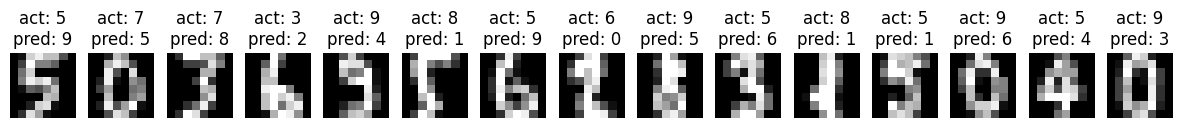

In [29]:
# train knn
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(xTrain, yTrain)

#do confusion matrix again
yPrediction = knn.predict(xTest)
accuracyKnn = accuracy_score(yTest, yPrediction)
confMatrixKnn = confusion_matrix(yTest, yPrediction)

print(f'KNN Accuracy: {accuracyKnn}')
print('KNN Confusion Matrix:')
print(confMatrixKnn)

#find misclassified points
misclassifiedKnn = np.where(yTest != yPrediction)[0]
fig, axes = plt.subplots(1, len(misclassifiedKnn), figsize=(15, 3))
for i, idx in enumerate(misclassifiedKnn):
    ax = axes[i]
    ax.imshow(np.reshape(digits.data[idx], (8, 8)), cmap='gray')
    ax.set_title(f'act: {yTest[idx]}\npred: {yPrediction[idx]}')
    ax.axis('off')
plt.show()



In [30]:
#find the most common mistake
mistakesKnn = [(yTest[i], yPrediction[i]) for i in misclassifiedKnn]
mostCommonMistakeKnn = Counter(mistakesKnn).most_common(1)[0]

print(f'Most common mistake in KNN: Actual {mostCommonMistakeKnn[0][0]} predicted as {mostCommonMistakeKnn[0][1]}, occurred {mostCommonMistakeKnn[1]} times')


Most common mistake in KNN: Actual 5 predicted as 9, occurred 2 times


Best k value: 3


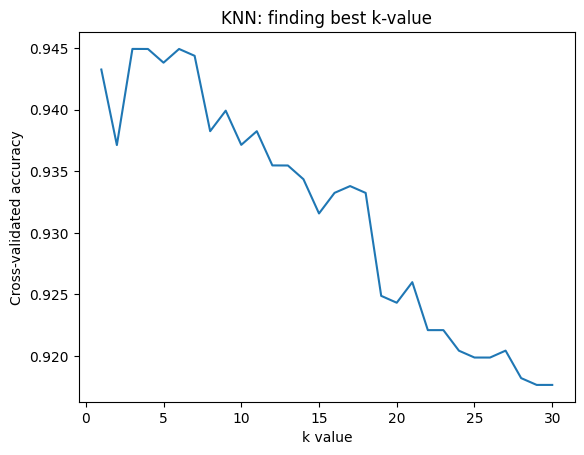

In [32]:
#find best k value using cross_validation
kValues = range(1, 31)
accuraciesKnn = []

for k in kValues:
    knn = KNeighborsClassifier(n_neighbors=k)
    cvScoresKnn = cross_val_score(knn, scaledData, digits.target, cv=5)
    accuraciesKnn.append(np.mean(cvScoresKnn))

bestK = kValues[np.argmax(accuraciesKnn)]
print(f'Best k value: {bestK}')

#plot accuracy for each k
plt.plot(kValues, accuraciesKnn)
plt.xlabel('k value')
plt.ylabel('Cross-validated accuracy')
plt.title('KNN: finding best k-value')
plt.show()


In [33]:
#test with raw data to see accuracy score

xTrainRaw, xTestRaw, yTrainRaw, yTestRaw = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

knnRaw = KNeighborsClassifier(n_neighbors=10)
knnRaw.fit(xTrainRaw, yTrainRaw)
yPredictionRaw = knnRaw.predict(xTestRaw)
accuracyRawKnn = accuracy_score(yTestRaw, yPredictionRaw)

print(f'Accuracy on raw data for KNN: {accuracyRawKnn}')

Accuracy on raw data for KNN: 0.9814814814814815


# PART 2: ONLINE NEWS DATASET

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from zipfile import ZipFile
import requests
import io


In [38]:
#import the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip'
response = requests.get(url)
with ZipFile(io.BytesIO(response.content)) as zfile:
    zfile.extractall()


In [47]:
data = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
# print(data.columns)
data = data.drop(columns=['url', ' timedelta'])

shares = data[' shares']
print(f'Min shares: {shares.min()}')
print(f'Median shares: {shares.median()}')
print(f'Max shares: {shares.max()}')

median_shares = shares.median()
data['popular'] = (data[' shares'] > median_shares).astype(int)
data = data.drop(columns=[' shares'])

X = data.drop(columns=['popular']).values
y = data['popular'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Min shares: 1
Median shares: 1400.0
Max shares: 843300


## PART 2 KNN

In [48]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 31)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
best_k = knn_cv.best_params_['n_neighbors']
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Best k for KNN: {best_k}')
print(f'KNN accuracy: {accuracy_knn}')

Best k for KNN: 27
KNN accuracy: 0.6251891710105936


## PART 2 SVM

In [49]:
X_train_svm, _, y_train_svm, _ = train_test_split(X_train, y_train, train_size=5000, random_state=42)
svm = SVC(kernel='rbf')
param_grid = {'C': [0.1, 1, 10, 100, 1000]}
svm_cv = GridSearchCV(svm, param_grid, cv=5)
svm_cv.fit(X_train_svm, y_train_svm)
best_C = svm_cv.best_params_['C']
svm_best = SVC(kernel='rbf', C=best_C)
svm_best.fit(X_train_svm, y_train_svm)
y_pred_svm = svm_best.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Best C for SVM: {best_C}')
print(f'SVM accuracy: {accuracy_svm}')

Best C for SVM: 1
SVM accuracy: 0.6360349756179586


## PART 2 DECISION TREE CLASSIFICATION

In [51]:
dt = DecisionTreeClassifier()
param_grid = {
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 5, 10, 20, 50, 100]
}
dt_cv = GridSearchCV(dt, param_grid, cv=5)
dt_cv.fit(X_train, y_train)
best_max_depth = dt_cv.best_params_['max_depth']
best_min_samples_split = dt_cv.best_params_['min_samples_split']
dt_best = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split)
dt_best.fit(X_train, y_train)
y_pred_dt = dt_best.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Best max_depth for Decision Tree: {best_max_depth}')
print(f'Best min_samples_split for Decision Tree: {best_min_samples_split}')
print(f'Decision Tree accuracy: {accuracy_dt}')

Best max_depth for Decision Tree: 5
Best min_samples_split for Decision Tree: 100
Decision Tree accuracy: 0.6355305195897091


## PART TWO: DESCRIBE YOUR FINDINGS !

In [55]:
print("\nFindings:")
print(f"KNN best k: {best_k}, accuracy: {accuracy_knn}")
print(f"SVM best C: {best_C}, accuracy: {accuracy_svm}")
print(f"Decision Tree best max_depth: {best_max_depth}, best min_samples_split: {best_min_samples_split}, accuracy: {accuracy_dt}")


Findings:
KNN best k: 27, accuracy: 0.6251891710105936
SVM best C: 1, accuracy: 0.6360349756179586
Decision Tree best max_depth: 5, best min_samples_split: 100, accuracy: 0.6355305195897091


The SVM worked the best because it had the highest accuracy. However, with the ideal split point and and best max depth was very close behind it in terms of accuracy. Then KNN is close behind the other two as well.

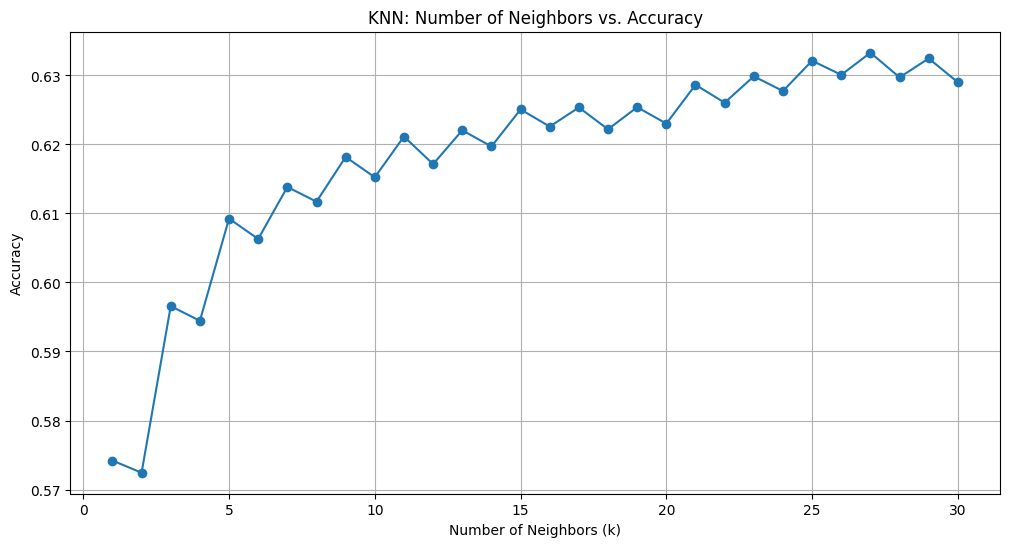

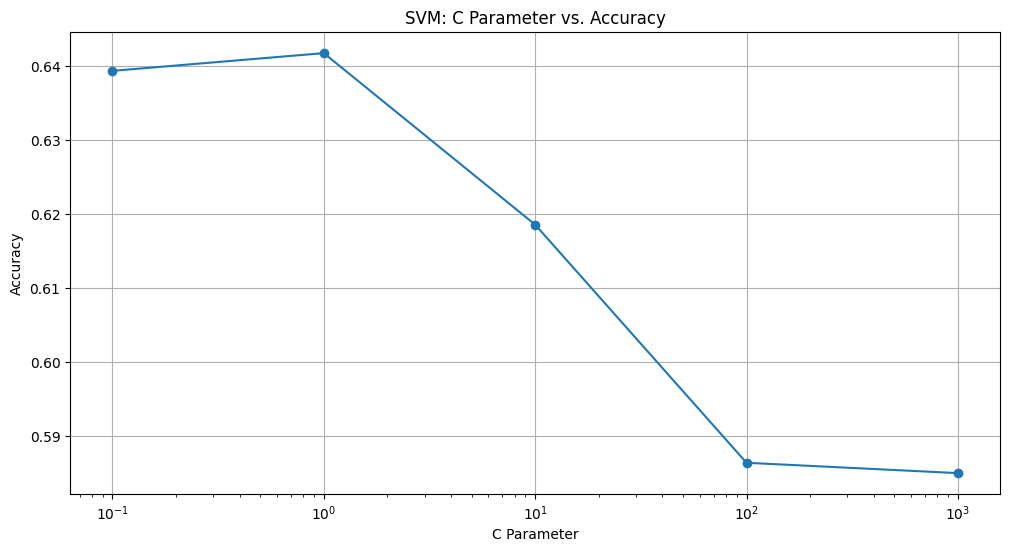

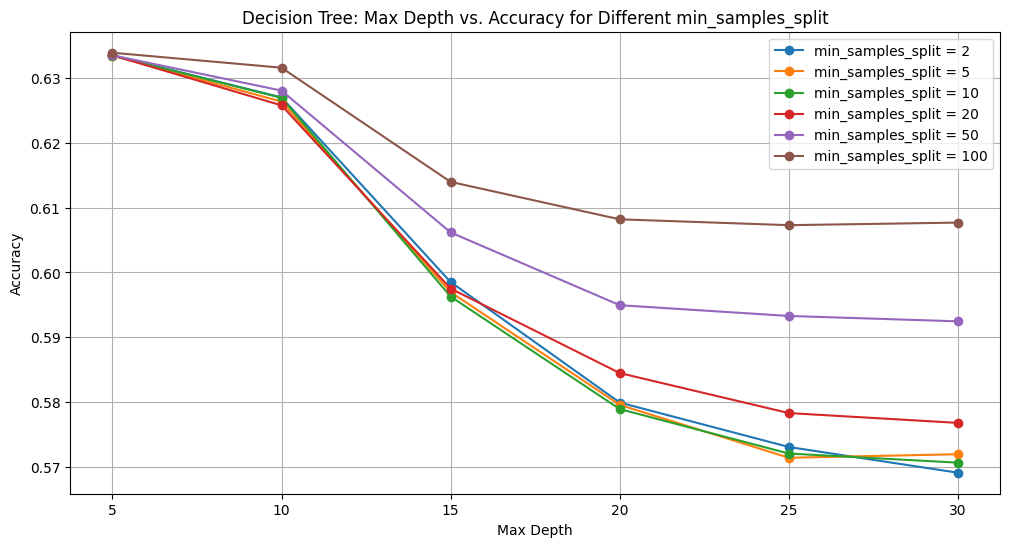

In [54]:
# plot k values against accuracy
k_values = range(1, 31)
knn_accuracies = [knn_cv.cv_results_['mean_test_score'][i] for i in range(len(k_values))]

plt.figure(figsize=(12, 6))
plt.plot(k_values, knn_accuracies, marker='o')
plt.title('KNN: Number of Neighbors vs. Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

#plot c values against accuracy 
C_values = [0.1, 1, 10, 100, 1000]
svm_accuracies = [svm_cv.cv_results_['mean_test_score'][i] for i in range(len(C_values))]

plt.figure(figsize=(12, 6))
plt.plot(C_values, svm_accuracies, marker='o')
plt.title('SVM: C Parameter vs. Accuracy')
plt.xlabel('C Parameter')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid(True)
plt.show()

# plot different combination accuracy for decision tree
max_depth_values = [5, 10, 15, 20, 25, 30]
min_samples_split_values = [2, 5, 10, 20, 50, 100]
dt_accuracies = np.array(dt_cv.cv_results_['mean_test_score']).reshape(len(max_depth_values), len(min_samples_split_values))

fig, ax = plt.subplots(figsize=(12, 6))
for i, min_samples_split in enumerate(min_samples_split_values):
    ax.plot(max_depth_values, dt_accuracies[:, i], label=f'min_samples_split = {min_samples_split}', marker='o')

ax.set_title('Decision Tree: Max Depth vs. Accuracy for Different min_samples_split')
ax.set_xlabel('Max Depth')
ax.set_ylabel('Accuracy')
ax.legend()
ax.grid(True)
plt.show()

The graphs above show how playing with the parameters influenced the accuracy of all of the types of classification. AS you increase the neighbors in KNN, it increases accuracy. For the C-value of the SVM, it peaks and then sharply declines. The decision tree has a peak high accuracy at a max depth of 5 (i didn't test before 5) and then drops. The max samples split at a larger number causes higher accuracy as well. 

Easiest to interpret? 

Decision trees are very easy to interpret. They are easy to understand how each node makes the decision. These models are very readable and we went over in class how that was a pro for using these. 

How would I interpret results?

I would look at the accuracy to see which of my models was the best. I would therefore choose the SVM. However, since the accuracies were so close to each other, I would look at other things like how easy they are to interpret and how important that is to what I want the model to do. But the decision tree also took over 2 minutes to run, so maybe if I was prioritizing speed, I would choose SVM. 
note to self --> we don't worry about overfitting because we used cross-validation